# Agriculture Yield Prediction using Machine Learning Models

# Importing Modules 

In [1]:
# importing libraries
import numpy as np #for linear algebra
import pandas as pd #for mathematical calculations
import matplotlib.pyplot as plt #for visualizations
import seaborn as sns #for visualizations
import sys
from sklearn import model_selection #for selecting the relevant models of machine learning
from sklearn.metrics import explained_variance_score #for taking out variance_score of the model
from sklearn.linear_model import LinearRegression #ml algorithm for predicting
from sklearn.tree import DecisionTreeRegressor #ml algorithm for predicting
from sklearn.neighbors import KNeighborsRegressor #ml algorithm for predicting
from sklearn.svm import SVR #ml algorithm for predicting


# Importing Dataset

In [2]:
#change acc to pc location
df2 = pd.read_csv(r"C:\Users\manit kakkar\Desktop\regression\crop final\crop 4 july\final reports\final 8 july\rice.csv")

In [3]:
#from google.colab import files
#uploaded = files.upload()

In [4]:
#import io
#df2 = pd.read_excel(io.BytesIO(uploaded['Book2.xlsx']))

# Data Preprocessing and Visualizations

In [5]:
#check data type of different columns
df2.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area               int64
Production         int64
Crop Yield       float64
dtype: object

In [6]:
#displays first 5 rows of dataset
df2.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Crop Yield
0,Andhra Pradesh,ANANTAPUR,1997,Kharif,Rice,35600,75400,2.117978
1,Andhra Pradesh,ANANTAPUR,1997,Rabi,Rice,18000,37300,2.072222
2,Andhra Pradesh,ANANTAPUR,1998,Kharif,Rice,38300,96800,2.527415
3,Andhra Pradesh,ANANTAPUR,1998,Rabi,Rice,26600,63900,2.402256
4,Andhra Pradesh,ANANTAPUR,1999,Kharif,Rice,37991,105082,2.765971


In [7]:
#statistics
df2.describe()

,Crop_Year,Area,Production,Crop Yield
count,481.000000,481.000000,4.810000e+02,481.000000
mean,2005.729730,96774.035343,2.988409e+05,2.924943
std,5.305434,89971.526563,3.063552e+05,0.821157
min,1997.000000,594.000000,1.558000e+03,0.813600
25%,2001.000000,19326.000000,5.363900e+04,2.365953
50%,2006.000000,61964.000000,1.667660e+05,2.916736
75%,2010.000000,174699.000000,4.912000e+05,3.502583
max,2014.000000,409286.000000,1.624324e+06,5.256997


In [8]:
#retrieving data having non zero values for different rows
data1=pd.notnull(df2)
data1

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Crop Yield
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
476,True,True,True,True,True,True,True,True
477,True,True,True,True,True,True,True,True
478,True,True,True,True,True,True,True,True
479,True,True,True,True,True,True,True,True


In [9]:
# axis = 1 means column to check the null values
df2.notnull().all(axis=1)

0      True
1      True
2      True
3      True
4      True
       ... 
476    True
477    True
478    True
479    True
480    True
Length: 481, dtype: bool

In [10]:
#dataset dimensions
df2.shape

(481, 8)

In [11]:
# mean value of all columns
df2.mean()

Crop_Year       2005.729730
Area           96774.035343
Production    298840.862786
Crop Yield         2.924943
dtype: float64

In [12]:
#dictionary of different districts in Andhra Pradesh
district_name=['ANANTAPUR','CHITTOOR','EAST GODAVARI','GUNTUR','KADAPA','KRISHNA','KURNOOL','PRAKASAM','SPSR NELLORE','SRIKAKULUM','VISAKHAPATANAM','VIZIANAGARAM','WEST GODAVARI']

In [13]:
print(district_name)

['ANANTAPUR', 'CHITTOOR', 'EAST GODAVARI', 'GUNTUR', 'KADAPA', 'KRISHNA', 'KURNOOL', 'PRAKASAM', 'SPSR NELLORE', 'SRIKAKULUM', 'VISAKHAPATANAM', 'VIZIANAGARAM', 'WEST GODAVARI']


In [14]:
#calculating total area
data4=df2['Area'].sum()
data4

46548311

In [15]:
#calculating area district wise
data4=df2['Area'].groupby(df2['District_Name']).sum()

In [16]:
print(data4)

District_Name
ANANTAPUR          873755
CHITTOOR          1164826
EAST GODAVARI     7334255
GUNTUR            5505963
KADAPA            1081070
KRISHNA           6287944
KURNOOL           1863159
PRAKASAM          2241514
SPSR NELLORE      4306522
SRIKAKULAM        3699007
VISAKHAPATANAM    1885936
VIZIANAGARAM      2312002
WEST GODAVARI     7992358
Name: Area, dtype: int64


In [17]:
#for plotting purpose
explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
colors=['gold','yellowgreen','red','blue','lightcoral','lightskyblue','pink','sienna','seashell','chocolate','aqua','teal','azure']

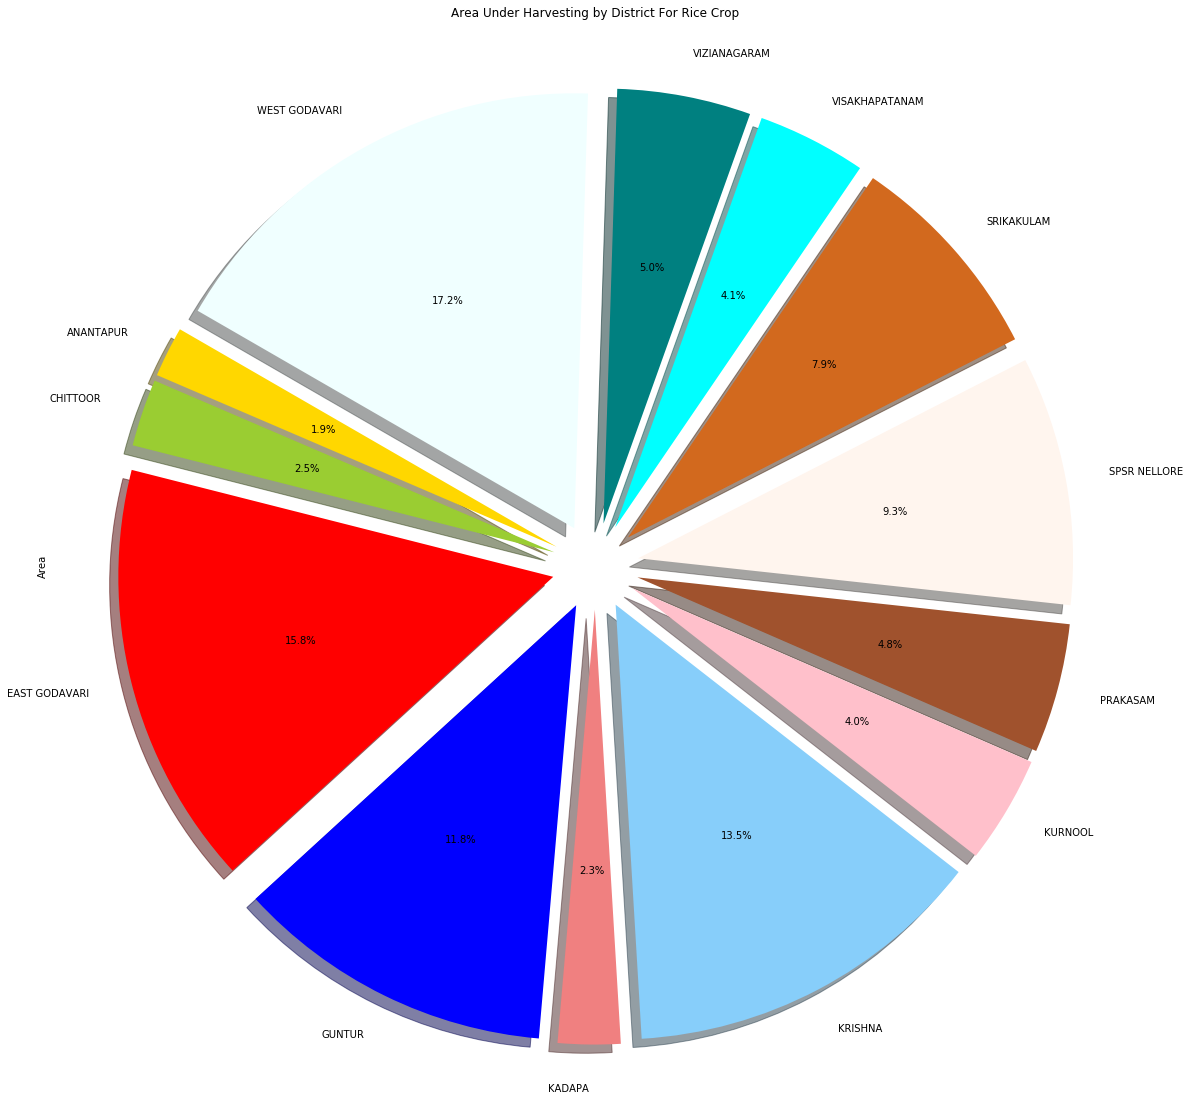

In [18]:
#plotting pie chart
plt.figure(figsize=(20,20))
data4.plot.pie(title='Area Under Harvesting by District For Rice Crop',colors=colors,explode=explode,shadow=True,autopct='%1.1f%%',startangle=150)
plt.show()

In [19]:
#Production value district wise
prod_data=df2['Production'].groupby(df2['District_Name']).sum()

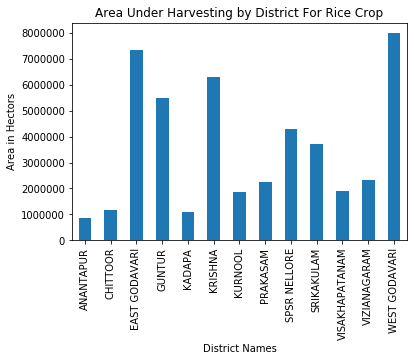

In [20]:
#rice crop area district wise
fig=plt.figure()
data4.plot.bar(title='Area Under Harvesting by District For Rice Crop')
plt.xlabel('District Names')
plt.ylabel('Area in Hectors' )
plt.show()

In [21]:
#district wise production
prod_data

District_Name
ANANTAPUR          2338133
CHITTOOR           3186365
EAST GODAVARI     24690929
GUNTUR            18245831
KADAPA             2799759
KRISHNA           20280606
KURNOOL            6080254
PRAKASAM           7523339
SPSR NELLORE      15252100
SRIKAKULAM         7496121
VISAKHAPATANAM     2930888
VIZIANAGARAM       5072821
WEST GODAVARI     27845309
Name: Production, dtype: int64

In [22]:
#mean district wise production
prod_data.mean()

11057111.923076924

In [23]:
#statistics
prod_data.describe()

count    1.300000e+01
mean     1.105711e+07
std      9.037010e+06
min      2.338133e+06
25%      3.186365e+06
50%      7.496121e+06
75%      1.824583e+07
max      2.784531e+07
Name: Production, dtype: float64

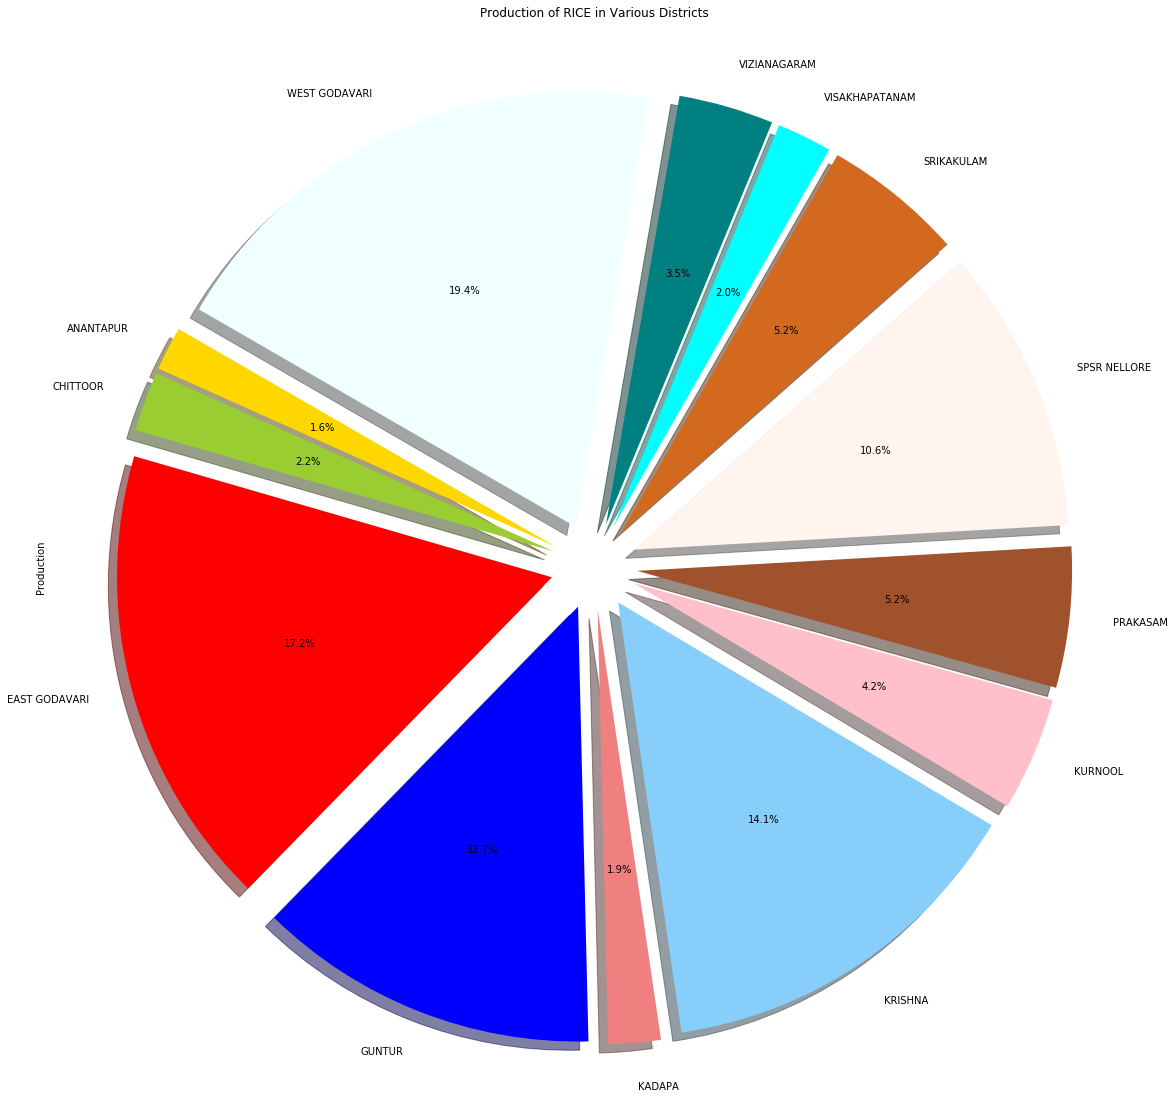

In [24]:
#plotting rice productions 
plt.figure(figsize=(20,20))
prod_data.plot.pie(title='Production of RICE in Various Districts',colors=colors,explode=explode,shadow=True,autopct='%1.1f%%',startangle=150)
plt.show()

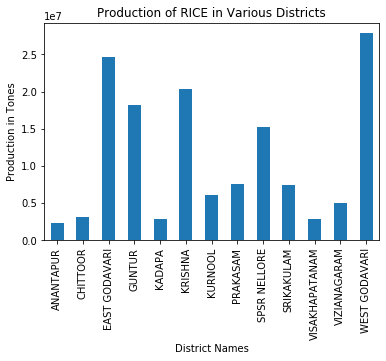

In [25]:
#rice production plot in bar chart
fig=plt.figure()
prod_data.plot.bar(title='Production of RICE in Various Districts')
plt.xlabel('District Names')
plt.ylabel('Production in Tones' )
plt.show()

In [26]:
#grouping season wise
season=df2['Area'].groupby(df2['Season']).sum()

In [27]:
#statistics
season.describe()

count    3.000000e+00
mean     1.551610e+07
std      1.373929e+07
min      2.393955e+06
25%      8.374702e+06
50%      1.435545e+07
75%      2.207718e+07
max      2.979891e+07
Name: Area, dtype: float64

In [28]:
#mean value
season.mean()

15516103.666666666

In [29]:
#Seasonal production 
season=df2['Production'].groupby(df2['Season']).sum()
season

Season
Kharif         79974717
Rabi           55312154
Whole Year      8455584
Name: Production, dtype: int64

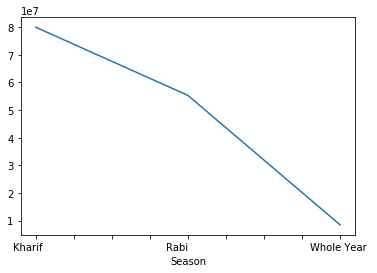

In [30]:
#plot
season.plot()
plt.show()

D:\ana2\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


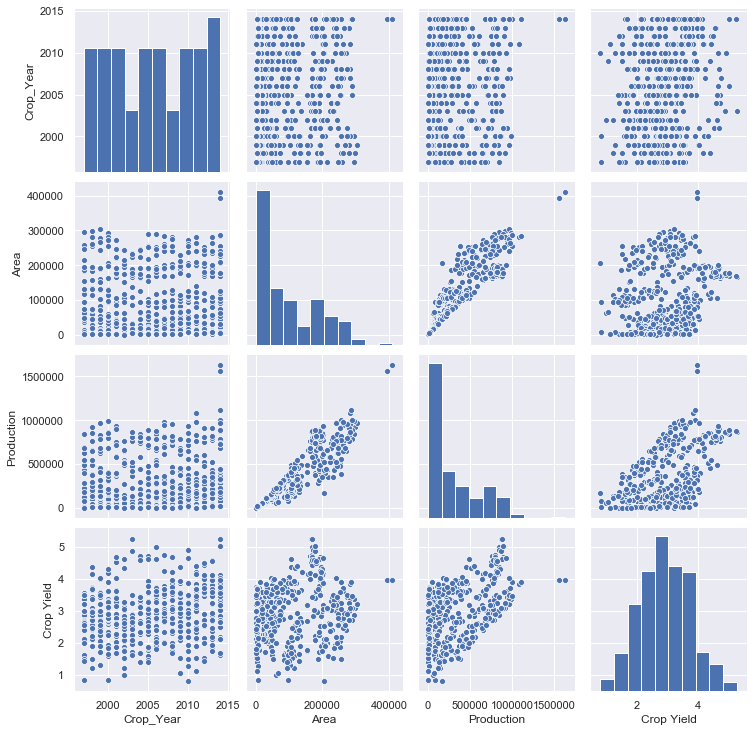

In [31]:
##pairplot visualizations of different columns for rice crop
sns.set()
cols = ['Crop_Year', 'Area', 'Production', 'Crop Yield']
sns.pairplot(df2[cols], size = 2.5)
plt.show();

# Feature Selection

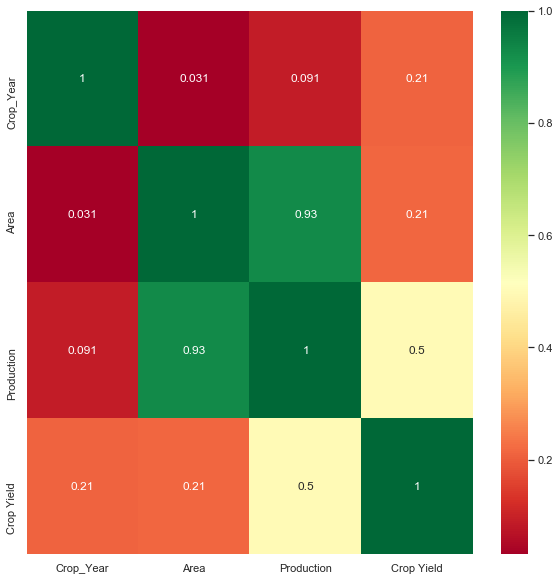

In [32]:
#generating heat map of crop
X = df2.iloc[:,0:6]  #independent columns
y = df2.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = df2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Training and Testing

In [33]:
#picking up different columns for training and testing
X=df2[['Area','Production']]
y=df2['Crop Yield']

In [34]:
#prediction (training and testing)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Random Forest machine learning predictions

In [35]:
#random forest algorithm
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [36]:
#array generation
y_pred_2= forest_reg.predict(X_test)
y_pred_2

array([3.64670345, 3.54940207, 2.88070049, 1.62074571, 2.54900964,
       2.74535615, 1.86467152, 3.29940447, 3.58343578, 2.54972485,
       2.31585488, 2.3502084 , 3.04545009, 3.73368328, 3.51029746,
       3.15060768, 1.40742164, 3.57790207, 2.6624605 , 3.71015989,
       2.53449998, 2.95162136, 2.92135025, 2.54900964, 3.6568902 ,
       2.33638616, 4.30877162, 5.0002003 , 2.92279207, 3.57010057,
       3.9185627 , 2.82588601, 3.25289724, 3.40021097, 3.07929985,
       3.08738496, 2.20078774, 3.11970965, 2.68418713, 3.05565061,
       3.47829959, 2.40438428, 2.52149959, 2.84114238, 4.00530356,
       2.90063935, 3.21785459, 3.02886801, 2.58070216, 1.91086315,
       3.69370176, 3.13530043, 4.21938083, 3.01022412, 3.75467881,
       2.72732954, 3.39669804, 2.25554208, 2.77339608, 2.51759122,
       3.25049863, 3.07644319, 1.77578815, 3.52646544, 2.87044597,
       3.10260643, 2.28120442, 4.6763486 , 3.56641839, 4.97260043,
       3.30744132, 2.19050519, 3.10322136, 3.81076039, 3.30960

In [37]:
#importing inbuilt functions
from sklearn.metrics import mean_squared_error, r2_score,explained_variance_score, mean_absolute_error

In [38]:
#checking r2_score
r2_score(y_test,y_pred_2)

0.8889755969584474

In [39]:
#checking mean absolute error
mean_absolute_error(y_test,y_pred_2)

0.19398789927786933

In [40]:
#checking mean squared error
mean_squared_error(y_test,y_pred_2)

0.07216134596206708

In [41]:
#implementing cross validation score
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [42]:
#function to display different values
def display_scores(forest_scores):
    print("Scores:", forest_scores)
    print("Mean:", forest_scores.mean())
    print("Standard deviation:", forest_scores.std())

display_scores(forest_rmse_scores)

Scores: [0.20891189 0.28978067 0.29410412 0.22613532 0.21878964 0.22954079
 0.29778185 0.33406803 0.29430079 0.20612371]
Mean: 0.25995368077479053
Standard deviation: 0.044074443944646435


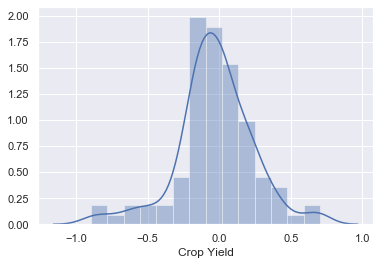

In [43]:
#plotting univariate distributions
sns.distplot((y_test-y_pred_2))

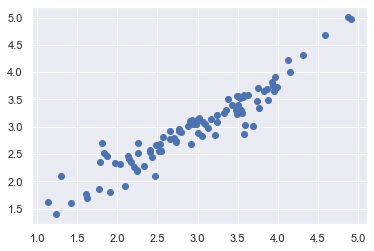

In [44]:
#scatter plot
plt.scatter(y_test,y_pred_2)

In [45]:
#Dataframe for the user to input area and production and then predict the yield
# a=int(input("Enter the value of area"))
# p=int(input("Enter the value of production"))
# crop_rice = pd.DataFrame(data=[[a,p]],columns=["Area1", "Production1"])
# print(crop_rice)

In [46]:
#a list named models is defined and various algortihms used above are passed as parameters to check efficiency of each model
models = []
models.append(LinearRegression())
models.append(DecisionTreeRegressor())
models.append(KNeighborsRegressor(n_neighbors = 2))
models.append(SVR(gamma='auto'))
names=['LR', 'DTR', 'KNR', 'SVR']

In [47]:
#prediction of rice crop in west godavari district in andhra pradesh
#ypred = []
# Creating function for the GUI
def rice_pred(district):
    #global ypred
    #global crop_rice
    x='Andhra Pradesh'
    w=district
    y='Rice'
    setinfo(y,x,w)
    cultivation_data = df2[['State_Name', 'District_Name', 'Crop_Year', 'Crop', 'Area', 'Production','Crop Yield']]
    predofprod=list()  
    cultivation_data=cultivation_data.groupby('State_Name').get_group(x) #grouping data
    cultivation_data=cultivation_data.groupby('Crop').get_group(y) #grouping data
    cultivation_data=cultivation_data.groupby('District_Name').get_group(w) #grouping data
#    cultivation_data=cultivation_data.groupby('Crop_Year')[['Production', 'Area','Crop Yield']].sum()
    X = cultivation_data[['Area','Production']].values.reshape(-1, 2)
    Y = cultivation_data['Crop Yield'].ravel()
    validation_size = 0.30  #test size
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=validation_size,random_state=1)
    varlist=list()
    for model in models: #function for calculating accuracy for various models 
        model.fit(X_train, y_train)
        y_pred=model.predict(X_test)
        #print(y_pred)
        r1=explained_variance_score(y_test, y_pred)
        varlist.append(r1)
    print("Explained variance score for different models")
    print('LR : ', varlist[0])
    print('DTR : ', varlist[1])
    print('KNR : ', varlist[2])
    print('SVR : ', varlist[3])
    sns.barplot(x=varlist, y=names)
    best_model_var=varlist[0] #function for choosing best model
    best_model=models[0]
    for i in range(len(names)): 
        if varlist[i]>best_model_var:
            best_model_var=varlist[i]
            best_model=models[i]
    index_rice = varlist.index(max(varlist))
    print(index_rice)
    model = models[index_rice]
    model.fit(X_train,y_train)
    #print(model)
    #ypred = model.predict(crop_rice)
    #ypred = model.predict(X_test)
    #print(ypred)
    best_model.fit(X_train, y_train)
    return model,X_train,y_train

# best_model.fit(X_train, y_train)



Explained variance score for different models
LR :  0.7103191384713674
DTR :  0.7856739919393956
KNR :  0.9290134039317696
SVR :  0.0
2
[2.29747901 2.50945943 3.22087689 2.97558639 1.56836297 3.28449558
 1.47550555 1.97392117 3.3455005  2.92602177 2.6515     3.38971867
 2.59398332 4.22679168 3.68244501 2.26418249 2.92349988 3.22087689
 2.95200184 1.92061015 4.11928695 1.8615012  3.45598819 1.83666943
 1.8111546  3.95218965 3.35900079 4.41679157 2.51454545 2.88603791
 2.69177138 2.63752123 2.6515     2.05444722 1.99947664 2.65700723
 3.57059556 3.57000256 2.78748682 2.17807402 2.54062515 2.50866869
 2.48099842 2.40100112 3.85290609 2.18698689 3.98868942 2.9928568
 3.44949956 2.97771167 3.76279978 3.46750034 3.5442907  3.52100439
 3.3049942  2.9347721  3.831501   2.68150031 2.18015491 2.84267696
 3.37499904 4.64599862 3.5035022  2.01568423 2.88603791 3.831501
 3.79799985 1.72410941 1.66500022 4.47349998 3.85592078 3.36949713
 2.02300032 2.5755075  3.59181522 2.9098331  4.26549774 3.00268

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

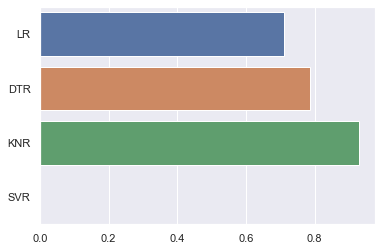

In [48]:
#predicting rice production in Andhra Pradesh districts
x='Andhra Pradesh'
y='Rice'
cultivation_data = df2[['State_Name', 'Crop_Year', 'Crop', 'Area', 'Production','Crop Yield']]
predofprod=list()  
cultivation_data=cultivation_data.groupby('State_Name').get_group(x) #grouping data
cultivation_data=cultivation_data.groupby('Crop').get_group(y) #grouping data
#cultivation_data=cultivation_data.groupby('Crop_Year')[['Production', 'Area','Crop Yield']].sum()
X = cultivation_data[['Area','Production']].values.reshape(-1, 2)
Y = cultivation_data['Crop Yield'].ravel()
validation_size = 0.20 #test size
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=validation_size,random_state=0)
varlist=list()
for model in models: #function for calculating accuracy for various models 
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    #print(y_pred)
    r1=explained_variance_score(y_test, y_pred)
    varlist.append(r1)
print("Explained variance score for different models")
print('LR : ', varlist[0])
print('DTR : ', varlist[1])
print('KNR : ', varlist[2])
print('SVR : ', varlist[3])
sns.barplot(x=varlist, y=names)
best_model_var=varlist[0] #function for choosing best model
best_model=models[0]
for i in range(len(names)):
    if varlist[i]>best_model_var:
        best_model_var=varlist[i]
        best_model=models[i]
index_rice = varlist.index(max(varlist))
print(index_rice)
model = models[index_rice]
model.fit(X_train,y_train)
ypred = model.predict(X_test)
print(ypred)


best_model.fit(X_train, y_train)


In [49]:
#Yield Predicton in maharashtra for Bajra Crop

In [50]:
#from google.colab import files
#uploaded = files.upload()

In [51]:
#import io
#df3 = pd.read_excel(io.BytesIO(uploaded['Book7 bajra.xlsx']))

## Importing Dataset for Maharashtra state

In [52]:
#change acc to pc location
df3 = pd.read_csv(r"C:\Users\manit kakkar\Desktop\regression\crop final\crop 4 july\final reports\final 8 july\bajra.csv")

## Data Preprocessing and Visualizations 

In [53]:
#checking data types
df3.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area               int64
Production         int64
Crop_Yield       float64
dtype: object

In [54]:
# First 5 rows of dataset
df3.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Crop_Yield
0,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,274100,152800,0.557461
1,Maharashtra,AHMEDNAGAR,1998,Kharif,Bajra,302400,243900,0.806548
2,Maharashtra,AHMEDNAGAR,1999,Kharif,Bajra,310600,178300,0.574050
3,Maharashtra,AHMEDNAGAR,2000,Kharif,Bajra,326100,187300,0.574364
4,Maharashtra,AHMEDNAGAR,2001,Kharif,Bajra,194400,82000,0.421811


In [55]:
#statistics
df3.describe()

,Crop_Year,Area,Production,Crop_Yield
count,367.000000,367.000000,367.000000,367.000000
mean,2005.237057,59321.861035,43584.645777,0.671448
std,5.129039,79735.372250,61291.444166,0.276988
min,1997.000000,2.000000,1.000000,0.031746
25%,2001.000000,2300.000000,1082.500000,0.485566
50%,2005.000000,17600.000000,8300.000000,0.625000
75%,2010.000000,99350.000000,72600.000000,0.837064
max,2014.000000,387500.000000,403300.000000,1.565814


In [56]:
#checking non zero values
data3=pd.notnull(df3)
data3

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Crop_Yield
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
362,True,True,True,True,True,True,True,True
363,True,True,True,True,True,True,True,True
364,True,True,True,True,True,True,True,True
365,True,True,True,True,True,True,True,True


In [57]:
#axis = 1 means vertical
df3.notnull().all(axis=1)

0      True
1      True
2      True
3      True
4      True
       ... 
362    True
363    True
364    True
365    True
366    True
Length: 367, dtype: bool

In [58]:
#dimensions of dataset
df3.shape

(367, 8)

In [59]:
#mean value of different columns
df3.mean()

Crop_Year      2005.237057
Area          59321.861035
Production    43584.645777
Crop_Yield        0.671448
dtype: float64

In [60]:
#list of districts 
district_name=['AHMEDNAGAR','AKOLA','AMRAVATI','AURANGABAD','BEED','BULDHANA','DHULE','GONDIA','HINGOLI','JALGAON','JALNA','KOLHAPUR','LATUR','NAGPUR','NANDED','NANDURBAR','NASHIK','OSMANABAD','PARBHANI','PUNE','SANGLI','SATARA','SOLAPUR','WARDHA','WASHIM']

In [61]:
print(district_name)

['AHMEDNAGAR', 'AKOLA', 'AMRAVATI', 'AURANGABAD', 'BEED', 'BULDHANA', 'DHULE', 'GONDIA', 'HINGOLI', 'JALGAON', 'JALNA', 'KOLHAPUR', 'LATUR', 'NAGPUR', 'NANDED', 'NANDURBAR', 'NASHIK', 'OSMANABAD', 'PARBHANI', 'PUNE', 'SANGLI', 'SATARA', 'SOLAPUR', 'WARDHA', 'WASHIM']


In [62]:
# total area
data6=df3['Area'].sum()
data6

21771123

In [63]:
# district wise area
data6=df3['Area'].groupby(df3['District_Name']).sum()

In [64]:
print(data6)

District_Name
AHMEDNAGAR    3762426
AKOLA           30109
AMRAVATI        10702
AURANGABAD    1896511
BEED          2673521
BULDHANA        81130
DHULE         2193245
GONDIA            400
HINGOLI          4802
JALGAON        813765
JALNA          994217
KOLHAPUR          300
LATUR          110956
NAGPUR            300
NANDED           3806
NANDURBAR      194447
NASHIK        4441658
OSMANABAD      312106
PARBHANI       125063
PUNE          1609327
SANGLI        1072667
SATARA        1072241
SOLAPUR        348315
WARDHA            300
WASHIM          18809
Name: Area, dtype: int64


In [65]:
#disctrict wise production
prod_data1=df3['Production'].groupby(df3['District_Name']).sum()

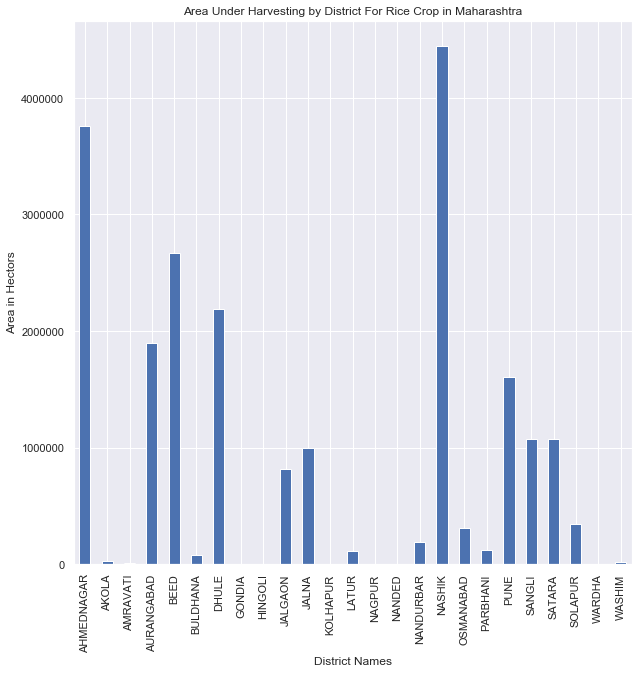

In [66]:
# plotting Area Under Harvesting by District For Rice Crop in Maharashtra
fig=plt.figure(figsize=(10,10))
data6.plot.bar(title='Area Under Harvesting by District For Rice Crop in Maharashtra')
plt.xlabel('District Names')
plt.ylabel('Area in Hectors' )
plt.show()

In [67]:
#district wise production
prod_data1

District_Name
AHMEDNAGAR    2348241
AKOLA           15205
AMRAVATI         5601
AURANGABAD    1736362
BEED          1906265
BULDHANA        43016
DHULE         1962191
GONDIA            200
HINGOLI          2901
JALGAON        821537
JALNA          862854
KOLHAPUR          300
LATUR           55631
NAGPUR            300
NANDED           2103
NANDURBAR      182511
NASHIK        3423195
OSMANABAD      130502
PARBHANI        77843
PUNE          1171982
SANGLI         485344
SATARA         607385
SOLAPUR        143991
WARDHA            300
WASHIM           9805
Name: Production, dtype: int64

In [68]:
#mean of production
prod_data1.mean()

639822.6

In [69]:
#statistics
prod_data1.describe()

count    2.500000e+01
mean     6.398226e+05
std      9.349037e+05
min      2.000000e+02
25%      5.601000e+03
50%      1.305020e+05
75%      8.628540e+05
max      3.423195e+06
Name: Production, dtype: float64

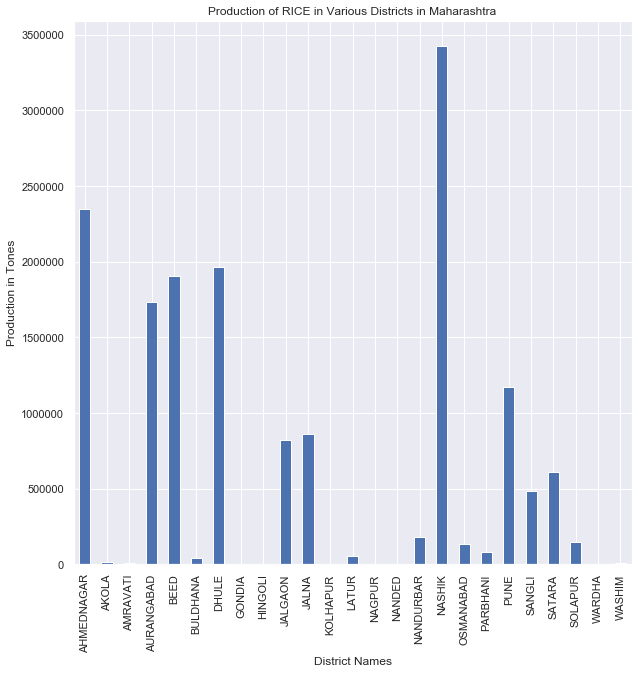

In [70]:
#rice production district wise
fig=plt.figure(figsize=(10,10))
prod_data1.plot.bar(title='Production of RICE in Various Districts in Maharashtra')
plt.xlabel('District Names')
plt.ylabel('Production in Tones' )
plt.show()

D:\ana2\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


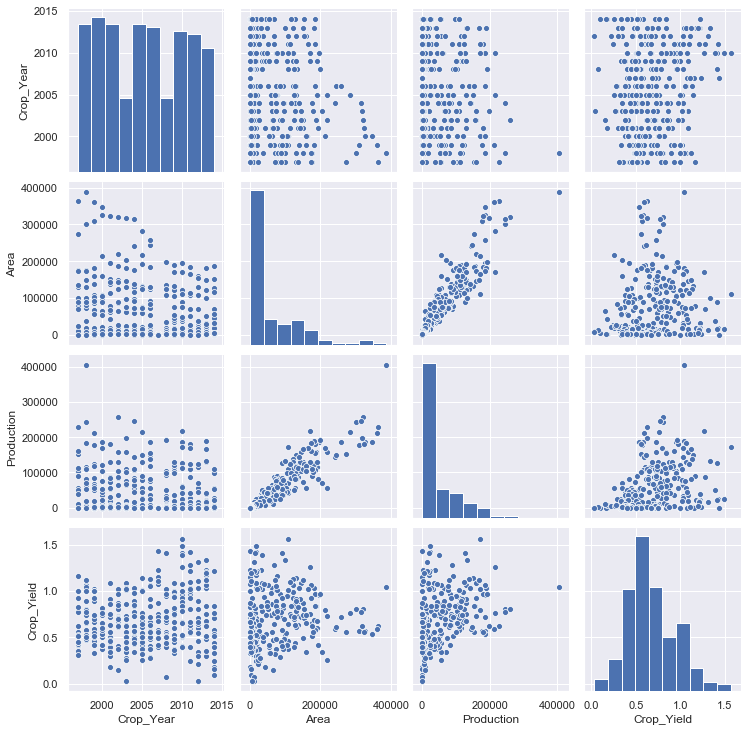

In [71]:
#pairplot visualizations of different columns
sns.set()
cols = ['Crop_Year', 'Area', 'Production', 'Crop_Yield']
sns.pairplot(df3[cols], size = 2.5)
plt.show();

## Training and Testing 

In [72]:
##picking up different columns for training and testing
X=df3[['Area','Production']]
y=df3['Crop_Yield']

In [73]:
#prediction using sklean through training and testing
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [74]:
#dimensions of training dataset
X_train.shape

(256, 2)

In [75]:
#dimensions of test dataset
X_test.shape

(111, 2)

In [76]:
#dimensions of training dataset
y_train.shape

(256,)

In [77]:
#dimensions of test dataset
y_test.shape

(111,)

In [78]:
#random forest algorithm
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [79]:
#array generation
y_pred_1= forest_reg.predict(X_test)
y_pred_1

array([1.0095737 , 0.44810455, 0.5       , 0.46785714, 0.71276895,
       0.43534914, 0.56043193, 0.33632439, 1.06376296, 0.44050286,
       1.00768389, 0.77069936, 0.49986477, 0.6599543 , 0.32300251,
       0.67095715, 0.86799912, 0.59327295, 0.7959831 , 0.60075957,
       0.97627234, 0.66666667, 0.83866325, 0.80496983, 0.48495113,
       0.487476  , 1.01518568, 0.63929549, 1.01782665, 0.60577741,
       0.53333333, 0.62214286, 0.43694217, 0.55952739, 0.8608577 ,
       0.76495062, 1.05349378, 0.61666667, 0.72736552, 0.97795428,
       0.62222222, 0.40015287, 0.49808855, 0.58513743, 0.64765623,
       0.42907563, 0.52476473, 0.51143357, 0.74913131, 1.06666315,
       1.        , 0.82847427, 0.80718763, 1.03394313, 0.46371237,
       0.7258375 , 0.78792081, 0.86666667, 0.5406015 , 0.61264998,
       0.79517559, 0.63312616, 0.62642381, 0.66166036, 0.56897228,
       0.37439298, 0.7221656 , 1.08577672, 0.82250801, 0.70213617,
       0.64597863, 0.54422282, 0.66631526, 0.50088967, 0.88854

In [80]:
#importing inbuilt functions
from sklearn.metrics import mean_squared_error, r2_score,explained_variance_score, mean_absolute_error

In [81]:
#checking r2_score
r2_score(y_test,y_pred_1)

0.834216013713889

In [82]:
#calculating mean absolute error
mean_absolute_error(y_test,y_pred_1)

0.07889497267048476

In [83]:
#calculating mean squared error
mean_squared_error(y_test,y_pred_1)

0.013808621141951931

In [84]:
# checking corss validation score
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [85]:
#function to display various calculations
def display_scores(forest_scores):
    print("Scores:", forest_scores)
    print("Mean:", forest_scores.mean())
    print("Standard deviation:", forest_scores.std())

display_scores(forest_rmse_scores)

Scores: [0.14198109 0.1225741  0.15016321 0.0906986  0.08335955 0.15748536
 0.10951711 0.14455237 0.1199975  0.08586489]
Mean: 0.12061937814684912
Standard deviation: 0.02622963847271673


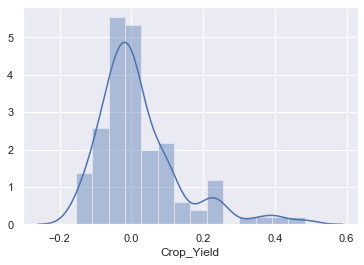

In [86]:
#distplot for finding residuals
sns.distplot((y_test-y_pred_1))

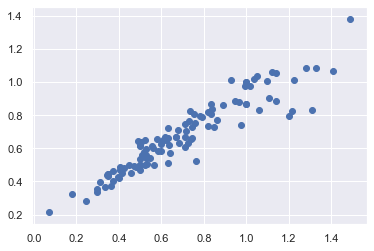

In [87]:
#scatter plot
plt.scatter(y_test,y_pred_1)

In [88]:
#prediction part of bajra crop in maharashtra with different districts
ypred = []
#Function for GUI
def bajra_pred(district):
    global ypred
    x='Maharashtra'
    w=district
    y='Bajra'
    setinfo(y,x,w)
    cultivation_data1 = df3[['State_Name', 'District_Name', 'Crop_Year', 'Crop', 'Area', 'Production','Crop_Yield']]
    predofprod=list()  
    cultivation_data1=cultivation_data1.groupby('State_Name').get_group(x) #grouping data
    cultivation_data1=cultivation_data1.groupby('Crop').get_group(y) #grouping data
    cultivation_data1=cultivation_data1.groupby('District_Name').get_group(w) #grouping data
#    cultivation_data1=cultivation_data1.groupby('Crop_Year')[['Production', 'Area','Crop_Yield']].sum()
    X = cultivation_data1[['Area','Production']].values.reshape(-1, 2)
    Y = cultivation_data1['Crop_Yield'].ravel()
    validation_size = 0.30 #test size
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=validation_size,random_state=1)
    varlist=list()
    for model in models: # Function to calculate accuracy for various models
        model.fit(X_train, y_train)
        y_pred=model.predict(X_test)
        #print(y_pred)
        r1=explained_variance_score(y_test, y_pred)
        varlist.append(r1)
    print("Explained variance score for different models")
    print('LR : ', varlist[0])
    print('DTR : ', varlist[1])
    print('KNR : ', varlist[2])
    print('SVR : ', varlist[3])
    sns.barplot(x=varlist, y=names)
    best_model_var=varlist[0] #function to choose best model
    best_model=models[0]
    for i in range(len(names)):
        if varlist[i]>best_model_var:
            best_model_var=varlist[i]
            best_model=models[i]
    index_bajra = varlist.index(max(varlist))
    print(index_bajra)
    model = models[index_bajra]
    model.fit(X_train,y_train)
    #ypred = model.predict(X_test)
    #print(ypred)
    best_model.fit(X_train, y_train)
    return model,X_train,y_train

In [89]:
# x='Maharashtra'
# w='AHMEDNAGAR'
# y='Bajra'
# cultivation_data1 = df3[['State_Name', 'District_Name', 'Crop_Year', 'Crop', 'Area', 'Production','Crop_Yield']]
# predofprod=list()  
# cultivation_data1=cultivation_data1.groupby('State_Name').get_group(x)
# cultivation_data1=cultivation_data1.groupby('Crop').get_group(y)
# cultivation_data1=cultivation_data1.groupby('District_Name').get_group(w)
# cultivation_data1=cultivation_data1.groupby('Crop_Year')[['Production', 'Area','Crop_Yield']].sum()
# X = cultivation_data1[['Area','Production']].values.reshape(-1, 2)
# Y = cultivation_data1['Crop_Yield'].ravel()
# validation_size = 0.30
# X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=validation_size,random_state=1)
# varlist=list()
# for model in models:
#     model.fit(X_train, y_train)
#     y_pred7=model.predict(X_test)
#     #print(y_pred7)
#     r1=explained_variance_score(y_test, y_pred7)
#     varlist.append(r1)
# print("Explained variance score for different models")
# print('LR : ', varlist[0])
# print('DTR : ', varlist[1])
# print('KNR : ', varlist[2])
# print('SVR : ', varlist[3])
# sns.barplot(x=varlist, y=names)
# best_model_var=varlist[0]
# best_model=models[0]
# for i in range(len(names)):
#     if varlist[i]>best_model_var:
#         best_model_var=varlist[i]
#         best_model=models[i]
# index_rice = varlist.index(max(varlist))
# print(index_rice)
# model = models[index_rice]
# model.fit(X_train,y_train)
# ypred = model.predict(X_test)
# print(ypred)


# best_model.fit(X_train, y_train)

## TKinter

In [90]:
# making GUI
from tkinter import* #importing GUI module
import random
import time
import win32com.client # import Component object module for API
import win32com.client.combrowse as com
import matplotlib.pyplot as plt #for visualizations
import seaborn as sns #for visualizations
import numpy as np #for array generation

a=0

objTKSolver = win32com.client.Dispatch("TKWX.Document")
objTKSolver.LoadModel("r", r"C:\Users\manit kakkar\Desktop\regression\crop final\crop 4 july\final reports\final 8 july\crop final for rice and bajra.tkwx")
#change the above location acc to the pc location of the file
objTKSolver.ShowWindow(3)

root = Tk()
root.geometry("1260x590+0+0")
root.title("Crop Production")
root.configure(background = "#39ff14")

Tops = Frame(root,bg="#b5651d",width = 1600,height=50,relief=SUNKEN)
Tops.pack(side=TOP)

f1 = Frame(root,width = 1210,height=590,relief=SUNKEN, bg="#39ff14")
f1.pack(side=LEFT)

# f2 = Frame(root ,width = 600,height=700,relief=SUNKEN)
# f2.pack(side=RIGHT)
#------------------TIME--------------
localtime=time.asctime(time.localtime(time.time()))
#-----------------INFO TOP------------
lblinfo = Label(Tops, font=( 'aria' ,30, 'bold' ),text="CROP PRODUCTION",fg="#0A0A0A",bd=10,anchor='w', bg="#b5651d")
lblinfo.grid(row=0,column=0)

# cropname = StringVar()
# statename = StringVar()
# districtname = StringVar()
# cropname.set("CROP")
# statename.set("STATE")
# districtname.set("DISTRICT")
info = []
lblcrop = Label(Tops, font=('times',14,"bold"),fg="black",anchor=W,bg="white")

def setinfo(crop,state,district):
    global info
    info=[]
    info.append(crop)
    info.append(",")
    info.append(state)
    info.append(",")
    info.append(district)
    #lblcrop = Label(Tops, font=('times',20,"bold"),fg="black",anchor=W,bg="white")
    lblcrop.config(text=info)
    lblcrop.grid(row=1,column=0)
    
#     info.append(cropname.get())
#     info.append(",")
#     info.append(statename.get())
#     info.append(",")
#     info.append(districtname.get())

setinfo("CROP","STATE","DISTRICT")

# lblcrop = Label(Tops, font=('times',20,"bold"),text=info,fg="black",anchor=W,bg="white")
# lblcrop.grid(row=1,column=0)

text_Input=StringVar()
operator =""





def calculation():
    Heads = float(heads.get())
    objTKSolver.SetValue("A","i",Heads)
    
    Grains = float(grains.get())
    objTKSolver.SetValue("B","i",Grains)
    
    Yield = float(Yields.get())
    objTKSolver.SetValue("D","i",Yield)
    
    Marketprice = float(marketprice.get())
    objTKSolver.SetValue("MP","i",Marketprice)
    
    Variablecost = float(variablecost.get())
    objTKSolver.SetValue("VC","i",Variablecost)
    
    Fixedcost = float(fixedcost.get())
    objTKSolver.SetValue("FC","i",Fixedcost)
    
    Maintanancecost = float(maintanancecost.get())
    objTKSolver.SetValue("OSMC","i",Maintanancecost)
    
    Grazingcost = float(grazingcost.get())
    objTKSolver.SetValue("OSGV","i",Grazingcost)
    
    Plantedacres = float(plantedacres.get())
    objTKSolver.SetValue("PA","i",Plantedacres)

    objTKSolver.Solve()
    return 1


def Ref():
    global a
    
    if a==0:
        calculation()
        
    gw = objTKSolver.GetValue("grainweight","o")
    
    Ngrains = objTKSolver.GetValue("C","o")
    
    Netreturns = objTKSolver.GetValue("NR","o")
    
    grain_weight.set(gw)
    
    ngrains.set(Ngrains)
    
    netreturns.set(Netreturns)
        


def qexit():
    root.destroy()

def reset():
    global a
    global model
    #global count
    #count = count + 1
    model = []
    heads.set("")
    grains.set("")
    Yields.set("")
    grain_weight.set("")
    ngrains.set("")
    marketprice.set("")
    variablecost.set("")
    fixedcost.set("")
    maintanancecost.set("")
    grazingcost.set("")
    plantedacres.set("")
    netreturns.set("")
    area.set("")
    production.set("")
    setinfo("CROP","STATE","DISTRICT")
    a=0  #extra

#---------------------------------------------------------------------------------------

heads = StringVar()
grains = StringVar()
Yields = StringVar()
grain_weight = StringVar()
ngrains = StringVar()
marketprice = StringVar()
variablecost = StringVar()
fixedcost = StringVar()
maintanancecost = StringVar()
grazingcost = StringVar()
plantedacres = StringVar()
netreturns = StringVar()
area = StringVar()
production = StringVar()

count = 0
# Yields.set(y_pred_2[count])

lblinput = Label(f1, font=( 'times' ,20, 'bold' ),text="INPUTS",fg="black",bg="white",bd=10,anchor='w') #"#39ff14"
lblinput.grid(row=0,column=3)

lbloutput = Label(f1, font=( 'times' ,20, 'bold' ),text="OUTPUTS",fg="black",bg="white",bd=10,anchor='w')
lbloutput.grid(row=0,column=7)

lblarea = Label(f1, font=( 'times' ,12, 'bold' ),text="Area",fg="#654321",bg="#39ff14",bd=10,anchor='w')
lblarea.grid(row=1,column=0)
txtarea = Entry(f1,font=('times' ,12,'bold'), textvariable=area , bd=6,insertwidth=4,bg="black" ,justify='right')
txtarea.grid(row=1,column=1)
txtarea.configure(fg = "white",insertbackground = "white")
lblarea = Label(f1, font=( 'times' ,12, 'bold' ),text="hectares",fg="#654321",bg="#39ff14",bd=10,anchor='w')
lblarea.grid(row=1,column=2)

lblprod = Label(f1, font=( 'times' ,12, 'bold' ),text="Production",fg="#654321",bg="#39ff14",bd=10,anchor='w')
lblprod.grid(row=2,column=0)
txtprod = Entry(f1,font=('times' ,12,'bold'), textvariable=production , bd=6,insertwidth=4,bg="black" ,justify='right')
txtprod.grid(row=2,column=1)
txtprod.configure(fg = "white",insertbackground = "white")
lblprod = Label(f1, font=( 'times' ,12, 'bold' ),text="tonnes",fg="#654321",bg="#39ff14",bd=10,anchor='w')
lblprod.grid(row=2,column=2)

lblyield = Label(f1, font=( 'times' ,12, 'bold' ),text="Predicted Yield",fg="#654321",bg="#39ff14",bd=10,anchor='w')
lblyield.grid(row=3,column=0)
txtyield = Entry(f1,font=('times' ,12,'bold'), textvariable=Yields , bd=6,insertwidth=4,bg="black" ,justify='right')
txtyield.grid(row=3,column=1)
txtyield.configure(fg = "white",insertbackground = "white")
lblyield = Label(f1, font=( 'times' ,12, 'bold' ),text="tonnes/hec.",fg="#654321",bg="#39ff14",bd=10,anchor='w')
lblyield.grid(row=3,column=2)

# lblheads = Label(f1, font=( 'times' ,12, 'bold' ),text="Heads/m^2",fg="#654321",bd=10,anchor='w',bg="#39ff14")
# lblheads.grid(row=1,column=0)
# txtheads = Entry(f1,font=('times' ,12,'bold'), textvariable=heads , bd=6,insertwidth=4,bg="black" ,justify='right')
# txtheads.grid(row=1,column=1)
# txtheads.configure(fg = "white",insertbackground = "white")

# lblgrains = Label(f1, font=( 'times' ,12, 'bold' ),text="Avg.Grains/Head",fg="#654321",bd=10,anchor='w',bg="#39ff14")
# lblgrains.grid(row=2,column=0)
# txtgrains = Entry(f1,font=('times' ,12,'bold'), textvariable=grains , bd=6,insertwidth=4,bg="black" ,justify='right')
# txtgrains.grid(row=2,column=1)
# txtgrains.configure(fg = "white",insertbackground = "white")

# lblTotalDeaths = Label(f1, font=( 'times' ,12, 'bold' ),text="Market Price",fg="#654321",bd=10,anchor='w',bg="#39ff14")
# lblTotalDeaths.grid(row=3,column=0)
# txtTotalDeaths = Entry(f1,font=('times' ,12,'bold'), textvariable=marketprice , bd=6,insertwidth=4,bg="black" ,justify='right')
# txtTotalDeaths.grid(row=3,column=1)
# txtTotalDeaths.configure(fg = "white",insertbackground = "white")

# lblTestperday = Label(f1, font=( 'times' ,12, 'bold' ),text="Variable Cost/Acre",fg="#654321",bd=10,anchor='w',bg="#39ff14")
# lblTestperday.grid(row=4,column=0)
# txtTestperday = Entry(f1,font=('times' ,12,'bold'), textvariable=variablecost , bd=6,insertwidth=4,bg="black" ,justify='right')
# txtTestperday.grid(row=4,column=1)
# txtTestperday.configure(fg = "white",insertbackground = "white")
# lblTestperdayu = Label(f1, font=( 'times' ,12, 'bold' ),text="Rs./Acre",fg="#654321",bd=10,anchor='w',bg="#39ff14")
# lblTestperdayu.grid(row=4,column=2)

#--------------------------------------------------------------------------------------
# lblTotaltest  = Label(f1, font=( 'times' ,12, 'bold' ),text="Fixed Cost/Acre",fg="#654321",bd=10,anchor='w',bg="#39ff14")
# lblTotaltest .grid(row=5,column=0)
# txtTotaltest  = Entry(f1,font=('times' ,12,'bold'), textvariable=fixedcost , bd=6,insertwidth=4,bg="black" ,justify='right')
# txtTotaltest .grid(row=5,column=1)
# txtTotaltest.configure(fg = "white",insertbackground = "white")

# lblrecovery = Label(f1, font=( 'times' ,12, 'bold' ),text="Maintanance Cost/Acre(Off Season)",fg="#654321",bd=10,anchor='w',bg="#39ff14")
# lblrecovery.grid(row=6,column=0)
# txtrecovery = Entry(f1,font=('times' ,12,'bold'), textvariable=maintanancecost , bd=6,insertwidth=4,bg="black" ,justify='right')
# txtrecovery.grid(row=6,column=1)
# txtrecovery.configure(fg = "white",insertbackground = "white")

# lblactivecase = Label(f1, font=( 'times' ,12, 'bold' ),text="Grazing Cost/Acre(Off Season)",fg="#654321",bd=10,anchor='w',bg="#39ff14")
# lblactivecase.grid(row=7,column=0)
# txtactivecase = Entry(f1,font=('times' ,12,'bold'), textvariable=grazingcost , bd=6,insertwidth=4,bg="black" ,justify='right')
# txtactivecase.grid(row=7,column=1)
# txtactivecase.configure(fg = "white",insertbackground = "white")

# lbldailyrate = Label(f1, font=( 'times' ,12, 'bold' ),text="Planted Acres",fg="#654321",bd=10,anchor='w',bg="#39ff14")
# lbldailyrate.grid(row=8,column=0)
# txtdailyrate = Entry(f1,font=('times' ,12,'bold'), textvariable=plantedacres , bd=6,insertwidth=4,bg="black" ,justify='right')
# txtdailyrate.grid(row=8,column=1)
# txtdailyrate.configure(fg = "white",insertbackground = "white")

lblheads = Label(f1, font=( 'times' ,12, 'bold' ),text="Heads",fg="#654321",bd=10,anchor='w',bg="#39ff14")
lblheads.grid(row=1,column=3)
txtheads = Entry(f1,font=('times' ,12,'bold'), textvariable=heads , bd=6,insertwidth=4,bg="black" ,justify='right')
txtheads.grid(row=1,column=4)
txtheads.configure(fg = "white",insertbackground = "white")
lblheads = Label(f1, font=( 'times' ,12, 'bold' ),text="/m^2",fg="#654321",bd=10,anchor='w',bg="#39ff14")
lblheads.grid(row=1,column=5)

lblgrains = Label(f1, font=( 'times' ,12, 'bold' ),text="Avg.Grains",fg="#654321",bd=10,anchor='w',bg="#39ff14")
lblgrains.grid(row=2,column=3)
txtgrains = Entry(f1,font=('times' ,12,'bold'), textvariable=grains , bd=6,insertwidth=4,bg="black" ,justify='right')
txtgrains.grid(row=2,column=4)
txtgrains.configure(fg = "white",insertbackground = "white")
lblgrains = Label(f1, font=( 'times' ,12, 'bold' ),text="/Head",fg="#654321",bd=10,anchor='w',bg="#39ff14")
lblgrains.grid(row=2,column=5)

lblTotalDeaths = Label(f1, font=( 'times' ,12, 'bold' ),text="Market Price",fg="#654321",bd=10,anchor='w',bg="#39ff14")
lblTotalDeaths.grid(row=3,column=3)
txtTotalDeaths = Entry(f1,font=('times' ,12,'bold'), textvariable=marketprice , bd=6,insertwidth=4,bg="black" ,justify='right')
txtTotalDeaths.grid(row=3,column=4)
txtTotalDeaths.configure(fg = "white",insertbackground = "white")
lblTotalDeaths = Label(f1, font=( 'times' ,12, 'bold' ),text="₹",fg="#654321",bd=10,anchor='w',bg="#39ff14")
lblTotalDeaths.grid(row=3,column=5)

lblTestperday = Label(f1, font=( 'times' ,12, 'bold' ),text="Variable Cost",fg="#654321",bd=10,anchor='w',bg="#39ff14")
lblTestperday.grid(row=4,column=3)
txtTestperday = Entry(f1,font=('times' ,12,'bold'), textvariable=variablecost , bd=6,insertwidth=4,bg="black" ,justify='right')
txtTestperday.grid(row=4,column=4)
txtTestperday.configure(fg = "white",insertbackground = "white")
lblTestperdayu = Label(f1, font=( 'times' ,12, 'bold' ),text="₹/acre",fg="#654321",bd=10,anchor='w',bg="#39ff14")
lblTestperdayu.grid(row=4,column=5)

lblTotaltest  = Label(f1, font=( 'times' ,12, 'bold' ),text="Fixed Cost",fg="#654321",bd=10,anchor='w',bg="#39ff14")
lblTotaltest .grid(row=5,column=3)
txtTotaltest  = Entry(f1,font=('times' ,12,'bold'), textvariable=fixedcost , bd=6,insertwidth=4,bg="black" ,justify='right')
txtTotaltest .grid(row=5,column=4)
txtTotaltest.configure(fg = "white",insertbackground = "white")
lblTotaltest  = Label(f1, font=( 'times' ,12, 'bold' ),text="₹/acre",fg="#654321",bd=10,anchor='w',bg="#39ff14")
lblTotaltest .grid(row=5,column=5)

lblrecovery = Label(f1, font=( 'times' ,12, 'bold' ),text="Maintanance Cost(Off Season)",fg="#654321",bd=10,anchor='w',bg="#39ff14")
lblrecovery.grid(row=6,column=3)
txtrecovery = Entry(f1,font=('times' ,12,'bold'), textvariable=maintanancecost , bd=6,insertwidth=4,bg="black" ,justify='right')
txtrecovery.grid(row=6,column=4)
txtrecovery.configure(fg = "white",insertbackground = "white")
lblrecovery = Label(f1, font=( 'times' ,12, 'bold' ),text="₹/acre",fg="#654321",bd=10,anchor='w',bg="#39ff14")
lblrecovery.grid(row=6,column=5)

lblactivecase = Label(f1, font=( 'times' ,12, 'bold' ),text="Grazing Cost(Off Season)",fg="#654321",bd=10,anchor='w',bg="#39ff14")
lblactivecase.grid(row=7,column=3)
txtactivecase = Entry(f1,font=('times' ,12,'bold'), textvariable=grazingcost , bd=6,insertwidth=4,bg="black" ,justify='right')
txtactivecase.grid(row=7,column=4)
txtactivecase.configure(fg = "white",insertbackground = "white")
lblactivecase = Label(f1, font=( 'times' ,12, 'bold' ),text="₹/acre",fg="#654321",bd=10,anchor='w',bg="#39ff14")
lblactivecase.grid(row=7,column=5)

lbldailyrate = Label(f1, font=( 'times' ,12, 'bold' ),text="Planted Acres",fg="#654321",bd=10,anchor='w',bg="#39ff14")
lbldailyrate.grid(row=8,column=3)
txtdailyrate = Entry(f1,font=('times' ,12,'bold'), textvariable=plantedacres , bd=6,insertwidth=4,bg="black" ,justify='right')
txtdailyrate.grid(row=8,column=4)
txtdailyrate.configure(fg = "white",insertbackground = "white")

# lblgw = Label(f1, font=( 'times' ,12, 'bold' ),text="Grain Weight",fg="#654321",bd=10,anchor='w',bg="#39ff14")
# lblgw.grid(row=2,column=2)
# txtgw = Entry(f1,font=('times' ,12,'bold'), textvariable=grain_weight , bd=6,insertwidth=4,bg="black" ,justify='right')
# txtgw.grid(row=2,column=3)
# txtgw.configure(fg = "white",insertbackground = "white")

# lblgrains = Label(f1, font=( 'times' ,12, 'bold' ),text="Grains/m^2",fg="#654321",bd=10,anchor='w',bg="#39ff14")
# lblgrains.grid(row=3,column=2)
# txtgrains = Entry(f1,font=('times' ,12,'bold'), textvariable=ngrains , bd=6,insertwidth=4,bg="black" ,justify='right')
# txtgrains.grid(row=3,column=3)
# txtgrains.configure(fg = "white",insertbackground = "white")

# lblnr = Label(f1, font=( 'times' ,12, 'bold' ),text="Net Returns",fg="#654321",bd=10,anchor='w',bg="#39ff14")
# lblnr.grid(row=4,column=3)
# txtnr = Entry(f1,font=('times' ,12,'bold'), textvariable=netreturns , bd=6,insertwidth=4,bg="black" ,justify='right')
# txtnr.grid(row=4,column=4)
# txtnr.configure(fg = "white",insertbackground = "white")
# lblnr = Label(f1, font=( 'times' ,12, 'bold' ),text="Rs.",fg="#654321",bd=10,anchor='w',bg="#39ff14")
# lblnr.grid(row=4,column=5)

lblgw = Label(f1, font=( 'times' ,12, 'bold' ),text="Grain Weight",fg="#654321",bd=10,anchor='w',bg="#39ff14")
lblgw.grid(row=3,column=6)
txtgw = Entry(f1,font=('times' ,12,'bold'), textvariable=grain_weight , bd=6,insertwidth=4,bg="black" ,justify='right')
txtgw.grid(row=3,column=7)
txtgw.configure(fg = "white",insertbackground = "white")
lblgw = Label(f1, font=( 'times' ,12, 'bold' ),text="g",fg="#654321",bd=10,anchor='w',bg="#39ff14")
lblgw.grid(row=3,column=8)

lblgrains = Label(f1, font=( 'times' ,12, 'bold' ),text="Grains",fg="#654321",bd=10,anchor='w',bg="#39ff14")
lblgrains.grid(row=4,column=6)
txtgrains = Entry(f1,font=('times' ,12,'bold'), textvariable=ngrains , bd=6,insertwidth=4,bg="black" ,justify='right')
txtgrains.grid(row=4,column=7)
txtgrains.configure(fg = "white",insertbackground = "white")
lblgrains = Label(f1, font=( 'times' ,12, 'bold' ),text="/m^2",fg="#654321",bd=10,anchor='w',bg="#39ff14")
lblgrains.grid(row=4,column=8)

lblnr = Label(f1, font=( 'times' ,12, 'bold' ),text="Net Returns",fg="#654321",bd=10,anchor='w',bg="#39ff14")
lblnr.grid(row=5,column=6)
txtnr = Entry(f1,font=('times' ,12,'bold'), textvariable=netreturns , bd=6,insertwidth=4,bg="black" ,justify='right')
txtnr.grid(row=5,column=7)
txtnr.configure(fg = "white",insertbackground = "white")
lblnr = Label(f1, font=( 'times' ,12, 'bold' ),text="₹",fg="#654321",bd=10,anchor='w',bg="#39ff14")
lblnr.grid(row=5,column=8)


# lbldrop = Label(f1, font=( 'times' ,12, 'bold' ),text="Drop Menu",fg="#654321",bd=10,anchor='w',bg="#39ff14")
# lbldrop.grid(row=5,column=2)

# clicked = StringVar()
# clicked.set("Monday")
# txtdrop = OptionMenu(f1, clicked, "Monday", "Tuesday", "Wednessday", "Thursday")
# txtdrop.grid(row=5, column=3)
# txtdrop = Entry(f1,font=('times' ,12,'bold'), textvariable=Deathvsrecovery , bd=6,insertwidth=4,bg="black" ,justify='right')
# txtdrop.grid(row=5,column=3)
# txtdrop.configure(fg = "white",insertbackground = "white")


opt_1 = IntVar()
count_rice=0
count_bajra=0
district_rice = ["ANANTAPUR","CHITTOOR","EAST GODAVARI","GUNTUR","KADAPA","KRISHNA","KURNOOL","PRAKASAM","SPSR NELLORE","SRIKAKULAM","VISAKHAPATANAM","VIZIANAGARAM","WEST GODAVARI"]
district_bajra = ["AHMEDNAGAR","AKOLA","AMRAVATI","AURANGABAD","BEED","BULDHANA","DHULE","GONDIA","HINGOLI","JALGAON","JALNA","KOLHAPUR","LATUR","NAGPUR","NANDED","NANDURBAR","NASHIK","OSMANABAD","PARBHANI","PUNE","SANGLI","SATARA","SOLAPUR","WARDHA","WASHIM"]
# def donothing():
#     filewin = Toplevel(root)
#     button = Button(filewin, text="Do nothing")
#     button.pack()
model = []
X_train_gui = []
y_train_gui = []

    
def disp_rice():
    #global count
    global a
    global model
    global X_train_gui
    global y_train_gui
    count = 0
    opt = opt_1.get()
    district = district_rice[opt]
    print(district)
    model, X_train_gui, y_train_gui = rice_pred(district)
    #Yields.set(ypred[count])
    #print(ypred)
    
    heads.set("")
    grains.set("")
    Yields.set("")
    grain_weight.set("")
    ngrains.set("")
    marketprice.set("")
    variablecost.set("")
    fixedcost.set("")
    maintanancecost.set("")
    grazingcost.set("")
    plantedacres.set("")
    netreturns.set("")
    area.set("")
    production.set("")
    a=0  #extra
    
def disp_bajra():
    #global count
    global a
    global model
    global X_train_gui
    global y_train_gui
    count = 0 
    opt = opt_1.get()
    district = district_bajra[opt]
    print(district_bajra[opt])
    model, X_train_gui, y_train_gui = bajra_pred(district)
    #Yields.set(ypred[count])
    #print(ypred)
    
    heads.set("")
    grains.set("")
    Yields.set("")
    grain_weight.set("")
    ngrains.set("")
    marketprice.set("")
    variablecost.set("")
    fixedcost.set("")
    maintanancecost.set("")
    grazingcost.set("")
    plantedacres.set("")
    netreturns.set("")
    area.set("")
    production.set("")
    a=0  #extra
    
def predict():
    global model
    print(model)
    print(X_train_gui)
    print(y_train_gui)
    Area = float(area.get())
    Production = float(production.get())
    crop = pd.DataFrame(data=[[Area,Production]],columns=["Area", "Production"]) #datadrame for user input for values
    print(crop)
    model.fit(X_train_gui,y_train_gui)
    value = float(model.predict(crop)) #prediction of the user entered values
    print(value)
    Yields.set(value)
    
def info():   # This is the function that would be called when "About..." would be pressed
    about = Toplevel()
    about.title("About Model")
    f = open("information.txt", encoding="utf8")
    steps = f.read()
    lblinfo = Text(about)
    lblinfo.pack()
    lblinfo.insert(END,steps)
    f.close()
    
menubar = Menu(root)
filemenu = Menu(menubar, tearoff=0,bg="#654321", fg="white")

# filemenu.add_command(label="Rice", command=donothing)
# filemenu.add_command(label="Bajra", command=donothing)

menubar.add_cascade(label="Crop", menu=filemenu)

ricemenu = Menu(menubar, tearoff=0,bg="#654321", fg="white") #rice
andhramenu = Menu(menubar, tearoff=0,bg="#654321", fg="white") #rice_state
# ricemenu.add_command(label="Andhra Pradesh",command=donothing)
for i in district_rice:
    andhramenu.add_radiobutton(label=i, value=count_rice, variable=opt_1,command=disp_rice)
    count_rice=count_rice+1
# andhramenu.add_radiobutton(label="Option 1", value=0, variable=opt_1,command=disp)
# andhramenu.add_radiobutton(label="Option 2", value=1, variable=opt_1, command=disp)

bajramenu = Menu(menubar, tearoff=0, bg="#654321", fg="white") #bajra
maharashtramenu = Menu(menubar, tearoff=0, bg="#654321", fg="white")
for i in district_bajra:
    maharashtramenu.add_radiobutton(label=i, value=count_bajra, variable=opt_1, command=disp_bajra)
    count_bajra=count_bajra+1

filemenu.add_cascade(label="Rice", menu=ricemenu)
filemenu.add_cascade(label="Bajra", menu=bajramenu)
ricemenu.add_cascade(label="Andhra Pradesh", menu=andhramenu)
bajramenu.add_cascade(label="Maharashtra", menu=maharashtramenu)


# editmenu = Menu(menubar, tearoff=0)
# editmenu.add_command(label="Undo", command=donothing)

# editmenu.add_separator()

# editmenu.add_command(label="Cut", command=donothing)
# editmenu.add_command(label="Copy", command=donothing)
# editmenu.add_command(label="Paste", command=donothing)
# editmenu.add_command(label="Delete", command=donothing)
# editmenu.add_command(label="Select All", command=donothing)

# menubar.add_cascade(label="Edit", menu=editmenu)

helpmenu = Menu(menubar, tearoff=0)  # this is the menue for the help to let the user know about the gui 
helpmenu.add_command(label="About...", command=info)
menubar.add_cascade(label="Help", menu=helpmenu)

root.config(menu=menubar)

#-----------------------------------------buttons------------------------------------------
lblTotal = Label(f1,text="---------------------",fg="#39ff14",bg="#39ff14")
lblTotal.grid(row=9,columnspan=3)
# lblTotal = Label(f1,text="---------------------",fg="#39ff14",bg="#39ff14")
# lblTotal.grid(row=10,columnspan=3)

btnTotal=Button(f1,padx=16,pady=8, bd=10 ,fg="white",font=('times' ,12,'bold'),width=8, text="PREDICT", bg="#654321",command=predict)
btnTotal.grid(row=10, column=3)

btnreset=Button(f1,padx=16,pady=8, bd=10 ,fg="white",font=('times' ,12,'bold'),width=8, text="RESET", bg="#654321",command=reset)
btnreset.grid(row=10, column=1)

btnreset=Button(f1,padx=16,pady=8, bd=10 ,fg="white",font=('times' ,12,'bold'),width=8, text="CALCULATE", bg="#654321",command=Ref)
btnreset.grid(row=10, column=5)

btnexit=Button(f1,padx=16,pady=8, bd=10 ,fg="white",font=('times' ,12,'bold'),width=8, text="EXIT", bg="#654321",command=qexit)
btnexit.grid(row=10, column=7)


root.mainloop()
objTKSolver.HideWindow()
com.main()

In [91]:
#rice_pred("WEST GODAVARI")

In [92]:
#Rice prediction
#print(ypred_rice)

In [93]:
#bajra production in Ahmednagar
#bajra_pred('AHMEDNAGAR')

In [94]:
print(crop_rice)

NameError: name 'crop_rice' is not defined

In [ ]:
m=[]
m = LinearRegression()
m = DecisionTreeRegressor()
print(m)
# m.fit(X_train_gui,y_train_gui)
# m.predict(crop_rice)